
--- Generation 1 ---
Selected Paths: [([8, 6, 0, 4, 7, 5, 1, 9, 2, 3], [49]), ([5, 7, 9, 3, 4, 1, 2, 0, 6, 8], [47]), ([6, 7, 9, 4, 5, 0, 2, 3, 1, 8], [50]), ([7, 5, 2, 3, 0, 9, 1, 4, 6, 8], [43]), ([4, 7, 5, 3, 8, 1, 9, 6, 2, 0], [48]), ([8, 1, 6, 3, 0, 5, 9, 4, 7, 2], [49]), ([5, 7, 9, 3, 4, 1, 2, 0, 6, 8], [47]), ([6, 7, 9, 4, 5, 0, 2, 3, 1, 8], [50]), ([4, 7, 5, 3, 8, 1, 9, 6, 2, 0], [48]), ([1, 0, 6, 5, 9, 3, 8, 4, 7, 2], [62])]
New Paths: [([[4, 7, 5, 3, 8, 1, 9, 6, 2, 0], [7, 5, 2, 3, 0, 9, 1, 4, 6, 8], [43]], [0]), ([[8, 1, 6, 3, 0, 5, 9, 4, 7, 2], [49]], [0]), ([[1, 0, 6, 5, 9, 3, 8, 4, 7, 2], [62]], [0]), ([[5, 7, 9, 3, 4, 1, 2, 0, 6, 8], [4, 7, 5, 3, 8, 1, 9, 6, 2, 0], [48]], [0]), ([[6, 7, 9, 4, 5, 0, 2, 3, 1, 8], [5, 7, 9, 3, 4, 1, 2, 0, 6, 8], [47]], [0]), ([[4, 7, 5, 3, 8, 1, 9, 6, 2, 0], [6, 7, 9, 4, 5, 0, 2, 3, 1, 8], [50]], [0]), ([[1, 0, 6, 5, 9, 3, 8, 4, 7, 2], [5, 7, 9, 3, 4, 1, 2, 0, 6, 8], [47]], [0]), ([[6, 7, 9, 4, 5, 0, 2, 3, 1, 8], [7, 5, 2, 3, 0, 9, 1, 4, 6

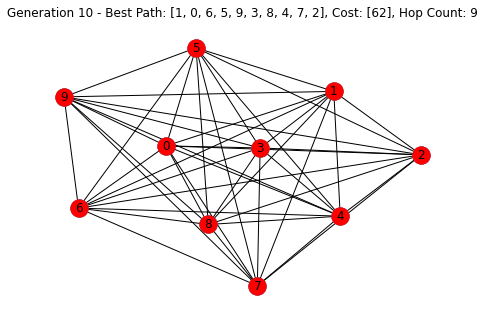

Efficient Route: [1, 0, 6, 5, 9, 3, 8, 4, 7, 2]


In [3]:
import random
import matplotlib.pyplot as plt
import networkx as nx

class AOMDVGA:
    def __init__(self, graph, residual_energy, L, B, Pc, Pm, Er, Nc, Oc, Pn):
        self.graph = graph
        self.residual_energy = residual_energy
        self.L = L
        self.B = B
        self.Pc = Pc
        self.Pm = Pm
        self.Er = Er
        self.Nc = Nc
        self.Oc = Oc
        self.Pn = Pn
        self.population_size = 10  # Adjust as needed
        self.population = self.initialize_population()
        self.hc = 0  # Initialize hc, replace with your actual hop count

    def initialize_population(self):
        population = []
        all_nodes = set(self.graph.nodes())
        for _ in range(self.population_size):
            all_nodes_list = list(all_nodes)
            random.shuffle(all_nodes_list)
            path = all_nodes_list.copy()
            cost = self.calculate_fitness([(path, 0)])
            population.append((path, cost))
        return population
    
    def get_parent_route(self, routes):
        return random.choice(routes)

    def crossover(self, routes):
        new_routes = []

        for _ in range(len(routes)):
            parent1 = self.get_parent_route(routes)
            parent2 = self.get_parent_route(routes)

            crossover_point = random.randint(1, len(parent1) - 1)

            # Ensure that the child_route is a list of integers
            child_route = list(parent1[:crossover_point]) + [node for node in parent2 if node not in parent1[:crossover_point]]

            cost = self.calculate_fitness([(child_route, 0)])  # Cost is initially set to 0
            new_routes.append((child_route, cost))

        return new_routes

    def calculate_fitness(self, routes):
        fitness_values = []
        for route, _ in routes:
            cost = sum(self.graph[route[i]][route[i + 1]]['weight'] for i in range(len(route) - 1) if i + 1 < len(route) and route[i] in self.graph and route[i + 1] in self.graph[route[i]])
            fitness_values.append(cost)
        return fitness_values
    
    def selection(self, population, fitness):
        # Add a small constant to each fitness value to avoid zero sum
        epsilon = 1e-6
        weights = [fit + epsilon for fit in fitness]

        # Select paths based on their fitness
        selected_paths = random.choices(population, weights=weights, k=len(population))
        return selected_paths

    def update_hop_count(self, best_route):
        # Update the hop count based on the number of nodes to jump to reach the destination
        self.hc = len(best_route) - 1

    def visualize_graph(self, path, title):
        # Visualization code, replace it with your own visualization logic
        G_copy = self.graph.copy()
        pos = nx.spring_layout(G_copy)
        nx.draw(G_copy, pos, with_labels=True)

        # Convert the elements of path to integers
        path_nodes = list(map(int, path))

        nx.draw_networkx_nodes(G_copy, pos, nodelist=path_nodes, node_color='r')
        plt.title(title)
        plt.show()

    def optimize(self, generations, visualize_interval):
        all_nodes = set(self.graph.nodes())

        for generation in range(1, generations + 1):
            print(f"\n--- Generation {generation} ---")

            fitness = self.calculate_fitness(self.population)
            if not self.population:
                print("Error: Population is empty.")
                return None

            selected_paths = self.selection(self.population, fitness)
            if not selected_paths:
                print("Error: Selected paths are empty.")
                return None
            print("Selected Paths:", selected_paths)

            new_paths = self.crossover(selected_paths)
            if not new_paths:
                print("Error: New paths are empty.")
                return None
            print("New Paths:", new_paths)

            # No mutation in this version

            if not self.population:
                print("Error: Population is empty after mutation.")
                return None
            print("Mutated Paths:", self.population)

            

            # Update the hop count
            best_route = max(self.population, key=lambda x: x[1])[0]
            self.update_hop_count(best_route)

            # Visualize the best path every visualize_interval generations
            if generation % visualize_interval == 0:
                best_path = max(self.population, key=lambda x: x[1])[0]
                title = f"Generation {generation} - Best Path: {best_path}, Cost: {max(self.population, key=lambda x: x[1])[1]}, Hop Count: {self.hc}"
                self.visualize_graph(best_path, title)

        if not self.population:
            print("Error: Population is empty after all generations.")
            return None

        best_path = max(self.population, key=lambda x: x[1])[0]
        return best_path

# Randomly generated graph
G = nx.complete_graph(10)
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = random.randint(1, 10)

residual_energy = 0
L = 5
B = 0
Pc = 0.8
Pm = 0.2
Er = []
Nc = None
Oc = None
Pn = 0.1

aomdv_ga = AOMDVGA(G, residual_energy, L, B, Pc, Pm, Er, Nc, Oc, Pn)
efficient_route = aomdv_ga.optimize(generations=10, visualize_interval=10)
print("Efficient Route:", efficient_route)




In [ ]:
D:\Jaskirat\Python\AOMDV_GA.ipynb